In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

### Data

In [2]:
features, labels = make_moons(n_samples=5000, random_state=42, noise=0.1)

In [3]:
features.shape, labels.shape

((5000, 2), (5000,))

In [4]:
features[:5]

array([[-0.1196884 ,  1.03684845],
       [ 0.03370055,  0.2493631 ],
       [ 0.03864294,  0.33033539],
       [ 0.22222051,  1.03355193],
       [ 0.74448612,  0.69288687]])

In [5]:
labels[:5]

array([0, 1, 1, 0, 0], dtype=int64)

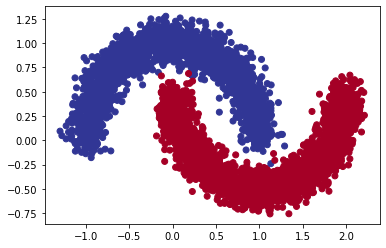

In [6]:
plt.scatter(features[:,0], features[:,1], c = labels, cmap = plt.cm.RdYlBu_r)

In [7]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i: min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

In [8]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tf.Tensor(
[[ 1.7724924  -0.20111475]
 [ 0.38175661  1.18292668]
 [-0.33209251  0.97141238]
 [ 0.22086357  1.18443003]
 [-0.88321325 -0.05719684]
 [ 0.44205236 -0.25016502]
 [ 0.43344995  0.90158255]
 [-0.78587769  0.69704403]
 [ 0.25423181  0.7446219 ]
 [ 0.89625717  0.06178603]], shape=(10, 2), dtype=float64) 
 tf.Tensor([1 0 0 0 0 1 0 0 0 0], shape=(10,), dtype=int64)


### Initializing Model Parameters
### Softmax Activation
### Defining the Model

In [9]:
net = tf.keras.models.Sequential()
net.add(tf.keras.layers.Flatten(input_shape=(2, )))
weight_initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01)
net.add(tf.keras.layers.Dense(2, activation='softmax'))

### Loss Function

In [10]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

### Optimization

In [11]:
trainer = tf.keras.optimizers.SGD(learning_rate=.1)

### Training

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=42)

In [13]:
num_epochs = 10

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        # Compute gradients and update parameters
        with tf.GradientTape() as tape:
            y_hat = net(X)
            l = loss(y, y_hat)
        params = net.trainable_variables
        grads = tape.gradient(l, params)
        trainer.apply_gradients(zip(grads, params))

### Decision Boundary

In [14]:
def plot_decision_boundary(net, X, y):
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
    # Create X values (we're going to predict on all of these)
    x_in = np.c_[xx.ravel(), yy.ravel()] 
    # Make predictions using the trained model
    y_pred = np.array(net(x_in)).argmax(axis=1)
    # Check for multi-class
    if y_pred[0].size > 1:
        print("doing multiclass classification...")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(y_pred).reshape(xx.shape)
    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classifcation...


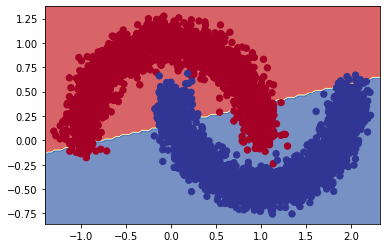

In [15]:
plot_decision_boundary(net, features, labels)